##__Analysis__

#1: There is a clear correlation between temperature and latitude.  The closer a city is to zero degrees latitude, the warmer it is

#2: There is little relationship between latitude and humidity.  Although there appears to be more cities with lower humidity in the northerm hemisphere, likely because it is currently late winter / early spring and temperatures are cooler

#3: Similarly, there a small relationship between latitude and windspeed.  Although there appears to be more cities with higher wind speeds in the northerm hemisphere, likely because it is currently late winter / early spring and temperatures are cooler.  Additionally, those cities furthest north tend to have the strongest winds.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['marsa matruh', 'mahebourg', 'hilo', 'barentsburg', 'sao felix do xingu', 'umzimvubu', 'albany', 'te anau', 'hithadhoo', 'bluff', 'genc', 'busselton', 'taolanaro', 'kelo', 'rikitea', 'vaitupu', 'qaanaaq', 'hermanus', 'dikson', 'ushuaia', 'hobart', 'atuona', 'bauchi', 'avarua', 'praia', 'maragogi', 'upernavik', 'vaini', 'mys shmidta', 'klaksvik', 'bealanana', 'ondangwa', 'bethel', 'chincholi', 'olafsvik', 'coihaique', 'nara', 'punta arenas', 'castro', 'calama', 'kapaa', 'xingyi', 'chuy', 'rawannawi', 'cape town', 'lakes entrance', 'evensk', 'pisco', 'komsomolskiy', 'smolensk', 'samusu', 'mandalgovi', 'carnarvon', 'aqtobe', 'borogontsy', 'estelle', 'chapais', 'qaqortoq', 'port elizabeth', 'majene', 'uwayl', 'longyearbyen', 'barrow', 'arraial do cabo', 'portland', 'ashland', 'tiksi', 'mancio lima', 'saskylakh', 'egvekinot', 'lucapa', 'khatanga', 'severo-kurilsk', 'port-de-paix', 'san patricio', 'yellowknife', 'camalu', 'sukumo', 'port hope', 'berlevag', 'ambon', 'kaseda', 'aporawan', 'cu

In [3]:
#create open lists to fill with API call data
temp=[]
temp_max=[]
cloudiness=[]
windspeed=[]
humidity=[]
date=[]
country=[]
lat=[]
lon=[]
ciudad=[]


#build query components
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key = '0df8771fc167e239825fa71719c9a3ab'


#build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


#loop to gather data with exceptions
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        ciudad.append(response['name'])
    except KeyError:
        print(city + ": name missing")
        ciudad=="N/A"
    try:
        lat.append(response['coord']['lat'])
    except KeyError:
        print(city + ": lat missing")
        lat=="N/A"
    try:
        lon.append(response['coord']['lon'])
    except KeyError:
        print(city + ": lon missing")
        lon=="N/A"
    try:
        country.append(response['sys']['country'])
    except KeyError:
        print(city + ": country missing")
        country=="N/A"
    try:
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print(city + ": cloudiness missing")
        cloudiness=="N/A"
    try:
        windspeed.append(response['wind']['speed'])
    except KeyError:
        print(city + ": windspeed missing")
        windspeed=="N/A"
    try:    
        humidity.append(response['main']['humidity'])
    except KeyError:
        print(city + ": humidity missing")
        humidity=="N/A"
    try:
        temp.append(response['main']['temp'])
        print(city + ": temp acquired")
    except KeyError:
        print(city + ": temp missing") 
        temp=="N/A"
    try:
        temp_max.append(response['main']['temp_max'])
    except KeyError:
        print(city + ": temp_max missing")
        temp_max=="N/A"
    try:
        date.append(response['dt'])
    except KeyError:
        print(city + ": date missing") 
        date == "N/A"

marsa matruh: temp acquired
mahebourg: temp acquired
hilo: temp acquired
barentsburg: name missing
barentsburg: lat missing
barentsburg: lon missing
barentsburg: country missing
barentsburg: cloudiness missing
barentsburg: windspeed missing
barentsburg: humidity missing
barentsburg: temp missing
barentsburg: temp_max missing
barentsburg: date missing
sao felix do xingu: temp acquired
umzimvubu: name missing
umzimvubu: lat missing
umzimvubu: lon missing
umzimvubu: country missing
umzimvubu: cloudiness missing
umzimvubu: windspeed missing
umzimvubu: humidity missing
umzimvubu: temp missing
umzimvubu: temp_max missing
umzimvubu: date missing
albany: temp acquired
te anau: temp acquired
hithadhoo: temp acquired
bluff: temp acquired
genc: temp acquired
busselton: temp acquired
taolanaro: name missing
taolanaro: lat missing
taolanaro: lon missing
taolanaro: country missing
taolanaro: cloudiness missing
taolanaro: windspeed missing
taolanaro: humidity missing
taolanaro: temp missing
taolanaro

hailin: temp acquired
mataura: temp acquired
tuktoyaktuk: temp acquired
vardo: temp acquired
zhanakorgan: temp acquired
tuatapere: temp acquired
sistranda: temp acquired
cagayan de tawi-tawi: name missing
cagayan de tawi-tawi: lat missing
cagayan de tawi-tawi: lon missing
cagayan de tawi-tawi: country missing
cagayan de tawi-tawi: cloudiness missing
cagayan de tawi-tawi: windspeed missing
cagayan de tawi-tawi: humidity missing
cagayan de tawi-tawi: temp missing
cagayan de tawi-tawi: temp_max missing
cagayan de tawi-tawi: date missing
le port: temp acquired
tabuk: temp acquired
iqaluit: temp acquired
isangel: temp acquired
srednekolymsk: temp acquired
margate: temp acquired
elat: temp acquired
sambava: temp acquired
karangampel: temp acquired
charlestown: temp acquired
nedjo: temp acquired
ovalle: temp acquired
road town: temp acquired
butaritari: temp acquired
port alfred: temp acquired
lorengau: temp acquired
chute-aux-outardes: temp acquired
vanimo: temp acquired
carnduff: temp acqui

raudeberg: temp acquired
tessalit: temp acquired
conceicao do araguaia: temp acquired
nyurba: temp acquired
kununurra: temp acquired
ponta delgada: temp acquired
hamilton: temp acquired
santa maria: temp acquired
krasnoselkup: name missing
krasnoselkup: lat missing
krasnoselkup: lon missing
krasnoselkup: country missing
krasnoselkup: cloudiness missing
krasnoselkup: windspeed missing
krasnoselkup: humidity missing
krasnoselkup: temp missing
krasnoselkup: temp_max missing
krasnoselkup: date missing
kharp: temp acquired
truth or consequences: temp acquired
pagudpud: temp acquired
bonthe: temp acquired
port augusta: temp acquired
shellbrook: temp acquired
tarudant: name missing
tarudant: lat missing
tarudant: lon missing
tarudant: country missing
tarudant: cloudiness missing
tarudant: windspeed missing
tarudant: humidity missing
tarudant: temp missing
tarudant: temp_max missing
tarudant: date missing
maua: temp acquired
havre: temp acquired
morant bay: temp acquired
terra santa: temp acqu

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))

In [61]:
#assess json data structure
pprint(response)

{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 20.76, 'lon': -105.33},
 'dt': 1553205313,
 'id': 4016734,
 'main': {'humidity': 74,
          'pressure': 1013,
          'temp': 25.79,
          'temp_max': 26,
          'temp_min': 25.56},
 'name': 'Bucerias',
 'sys': {'country': 'MX',
         'id': 7156,
         'message': 0.0036,
         'sunrise': 1553173475,
         'sunset': 1553217145,
         'type': 1},
 'visibility': 24140,
 'weather': [{'description': 'clear sky',
              'icon': '02d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 210, 'speed': 7.2}}


In [4]:
#create weather dictionary and data frame

weather_dict = {
    "City": ciudad,
    "Country": country,
    "Latitude": lat,
    "Longitude": lon,
    "Date": date,
    "Temperature": temp,
    "Max Temperature": temp_max,
    "Humidity": humidity,
    "Wind Speed": windspeed,
    "Cloudiness": cloudiness
}

weather_data = pd.DataFrame(weather_dict)
weather_data.head()


,City,Country,Latitude,Longitude,Date,Temperature,Max Temperature,Humidity,Wind Speed,Cloudiness
0,Marsa Matruh,EG,31.35,27.25,1553202000,16.00,16.00,77,2.60,40
1,Mahebourg,MU,-20.41,57.70,1553206441,26.50,28.00,74,2.60,40
2,Hilo,US,19.71,-155.08,1553206530,23.16,26.00,54,4.10,90
3,Sao Felix do Xingu,BR,-6.64,-51.99,1553206656,28.41,28.41,80,0.89,24
4,Albany,US,42.65,-73.75,1553206215,3.96,6.11,86,2.10,90


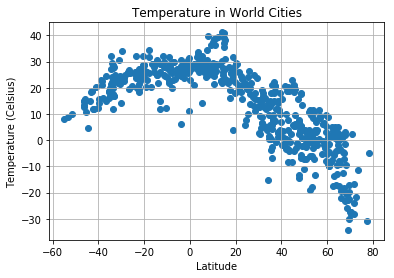

In [5]:
# Build a scatter plot for temperature
plt.scatter(weather_data["Latitude"], weather_data["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()  

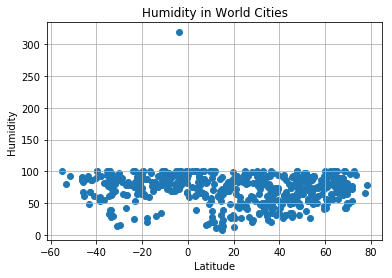

In [6]:
# Build a scatter plot for humidity
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()  

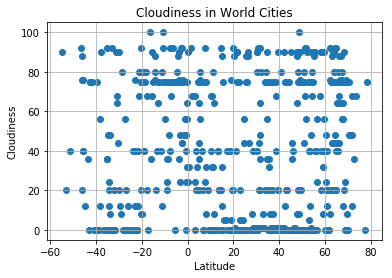

In [7]:
# Build a scatter plot for cloudiness
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()  

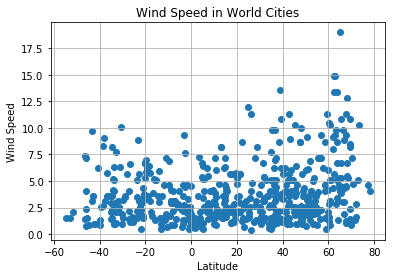

In [8]:
# Build a scatter plot for wind speed
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()  